#### Downloads

In [68]:
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



#### Imports


In [3]:
import pandas as pd 
import math
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
responses_df=pd.DataFrame(pd.read_csv('../DataEngineering/02Prep/responsesPrep.csv'))
organisation_review_df=pd.DataFrame(pd.read_csv('../DataEngineering/02Prep/organisationReviewPrep.csv'))
trainings_df=pd.DataFrame(pd.read_csv('../DataEngineering/02Prep/trainingsPrep.csv'))
# responses_df.info()
# organisation_review_df.info()
trainings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   trainingId    100 non-null    int64 
 1   trainingName  100 non-null    object
 2   domainName    100 non-null    object
 3   domainId      100 non-null    int64 
 4   duration      100 non-null    int64 
 5   startDate     100 non-null    object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [5]:
trainings_reaponses_merged_df=responses_df.merge(trainings_df,on=['trainingId'])
trainings_reaponses_merged_df.info()
print(trainings_reaponses_merged_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   responseId    10000 non-null  int64 
 1   userId        10000 non-null  int64 
 2   trainingId    10000 non-null  int64 
 3   score         10000 non-null  int64 
 4   responseDate  10000 non-null  object
 5   trainingName  10000 non-null  object
 6   domainName    10000 non-null  object
 7   domainId      10000 non-null  int64 
 8   duration      10000 non-null  int64 
 9   startDate     10000 non-null  object
dtypes: int64(6), object(4)
memory usage: 781.4+ KB
      responseId  userId  trainingId  score responseDate  \
0              1      95          20      2   2024-10-06   
1              2     181          28     34   2024-10-07   
2              3     146           2     71   2024-10-07   
3              4     293          39      4   2024-10-06   
4              5       3          86

In [6]:
merged_df=trainings_reaponses_merged_df.merge(organisation_review_df,on=['trainingId','userId'], how='left')
merged_df.drop_duplicates()
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10508 entries, 0 to 10507
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   responseId          10508 non-null  int64  
 1   userId              10508 non-null  int64  
 2   trainingId          10508 non-null  int64  
 3   score               10508 non-null  int64  
 4   responseDate        10508 non-null  object 
 5   trainingName        10508 non-null  object 
 6   domainName          10508 non-null  object 
 7   domainId            10508 non-null  int64  
 8   duration            10508 non-null  int64  
 9   startDate           10508 non-null  object 
 10  reviewId            3430 non-null   float64
 11  organisationScore   3430 non-null   float64
 12  communicationMarks  3430 non-null   float64
 13  hardWorkingMarks    3430 non-null   float64
 14  disciplineMarks     3430 non-null   float64
dtypes: float64(5), int64(6), object(4)
memory usage: 1.2+

,responseId,userId,trainingId,score,domainId,duration,reviewId,organisationScore,communicationMarks,hardWorkingMarks,disciplineMarks
count,10508.000000,10508.000000,10508.000000,10508.000000,10508.000000,10508.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000
mean,5015.260849,150.766749,50.890084,50.259897,2.772649,9.314427,4961.589796,49.722741,0.501458,0.496793,0.494169
std,2889.560752,86.633160,28.894912,29.190851,1.403739,5.792132,2859.296797,29.147513,0.500071,0.500063,0.500039
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,2519.750000,77.000000,26.000000,25.000000,1.000000,4.000000,2539.750000,24.250000,0.000000,0.000000,0.000000
50%,5022.500000,150.000000,51.000000,50.000000,3.000000,9.000000,4895.000000,50.000000,1.000000,0.000000,0.000000
75%,7518.250000,226.000000,76.000000,76.000000,4.000000,14.000000,7441.000000,75.000000,1.000000,1.000000,1.000000
max,10000.000000,300.000000,100.000000,100.000000,5.000000,20.000000,9996.000000,100.000000,1.000000,1.000000,1.000000


In [7]:
merged_df['communicationMarks'].fillna(math.ceil(merged_df['communicationMarks'].mean()),inplace=True)
merged_df['disciplineMarks'].fillna(math.ceil(merged_df['disciplineMarks'].mean()),inplace=True)
merged_df['hardWorkingMarks'].fillna(math.ceil(merged_df['hardWorkingMarks'].mean()),inplace=True)
merged_df['organisationScore'].fillna(math.ceil(merged_df['organisationScore'].mean()),inplace=True)


C:\Users\RamjeeRai\AppData\Local\Temp\ipykernel_4264\3286621912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['communicationMarks'].fillna(math.ceil(merged_df['communicationMarks'].mean()),inplace=True)
C:\Users\RamjeeRai\AppData\Local\Temp\ipykernel_4264\3286621912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [8]:
merged_df

,responseId,userId,trainingId,score,responseDate,trainingName,domainName,domainId,duration,startDate,reviewId,organisationScore,communicationMarks,hardWorkingMarks,disciplineMarks
0,1,95,20,2,2024-10-06,Total 6th generation internet solution,DevOps,3,2,2024-10-26,NaN,50.0,1.0,1.0,1.0
1,2,181,28,34,2024-10-07,Function-based executive hub,DataEngineering,1,20,2025-02-22,NaN,50.0,1.0,1.0,1.0
2,3,146,2,71,2024-10-07,Digitized cohesive installation,FullStack,2,1,2025-06-11,NaN,50.0,1.0,1.0,1.0
3,4,293,39,4,2024-10-06,Realigned systematic info-mediaries,DevOps,3,13,2025-09-28,NaN,50.0,1.0,1.0,1.0
4,5,3,86,48,2024-10-07,Sharable zero administration alliance,FullStack,2,3,2025-02-16,1655.0,16.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10503,9997,291,2,46,2024-10-07,Digitized cohesive installation,FullStack,2,1,2025-06-11,NaN,50.0,1.0,1.0,1.0
10504,9998,222,5,46,2024-10-06,Reactive object-oriented time-frame,DevOps,3,9,2025-04-23,NaN,50.0,1.0,1.0,1.0
10505,9999,94,56,10,2024-10-06,Right-sized multi-state firmware,DataEngineering,1,6,2025-09-11,NaN,50.0,1.0,1.0,1.0
10506,10000,110,11,7,2024-10-06,Intuitive coherent definition,DataScience,4,16,2024-12-11,4335.0,43.0,0.0,1.0,0.0


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10508 entries, 0 to 10507
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   responseId          10508 non-null  int64  
 1   userId              10508 non-null  int64  
 2   trainingId          10508 non-null  int64  
 3   score               10508 non-null  int64  
 4   responseDate        10508 non-null  object 
 5   trainingName        10508 non-null  object 
 6   domainName          10508 non-null  object 
 7   domainId            10508 non-null  int64  
 8   duration            10508 non-null  int64  
 9   startDate           10508 non-null  object 
 10  reviewId            3430 non-null   float64
 11  organisationScore   10508 non-null  float64
 12  communicationMarks  10508 non-null  float64
 13  hardWorkingMarks    10508 non-null  float64
 14  disciplineMarks     10508 non-null  float64
dtypes: float64(5), int64(6), object(4)
memory usage: 1.2+

In [10]:
columns_to_convert = ['reviewId', 'organisationScore', 'communicationMarks', 'hardWorkingMarks', 'disciplineMarks']
merged_df[columns_to_convert] = merged_df[columns_to_convert].fillna(0).astype(int)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10508 entries, 0 to 10507
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   responseId          10508 non-null  int64 
 1   userId              10508 non-null  int64 
 2   trainingId          10508 non-null  int64 
 3   score               10508 non-null  int64 
 4   responseDate        10508 non-null  object
 5   trainingName        10508 non-null  object
 6   domainName          10508 non-null  object
 7   domainId            10508 non-null  int64 
 8   duration            10508 non-null  int64 
 9   startDate           10508 non-null  object
 10  reviewId            10508 non-null  int64 
 11  organisationScore   10508 non-null  int64 
 12  communicationMarks  10508 non-null  int64 
 13  hardWorkingMarks    10508 non-null  int64 
 14  disciplineMarks     10508 non-null  int64 
dtypes: int64(11), object(4)
memory usage: 1.2+ MB


In [11]:
# merged_df.drop(columns=['responseId','userId','trainingId','responseData','dommainId','startDate','reviewId'])

In [12]:
def duration_time(value):
    if value>0  and value<=7:
        return "Small Term"
    elif value>7 and value<=14:
        return "Mid Term"
    elif value>14:
        return "Long Term"
    

merged_df['courseType']=merged_df['duration'].apply(duration_time)

In [13]:
def evaluate_promotion(row):
    combined_score = row['score'] + row['organisationScore']
    parameter=row['hardWorkingMarks']+row['disciplineMarks']+row['communicationMarks']
    parameter_score=round(parameter*33.33)
    total_score=combined_score+parameter_score


    if(total_score>220):
        return "Promoted"
    elif(total_score>120):
        return "In Review"
    else :
        return "Layoff"

    # if (combined_score > 120 and row['communicationMarks'] == 1 and 
    #     row['hardWorkingMarks'] == 1 and row['disciplineMarks'] == 1):
    #     return 'Promoted'

    # elif (combined_score > 140 and 
    #       ((row['communicationMarks'] == 1 and row['hardWorkingMarks'] == 1) or
    #        (row['communicationMarks'] == 1 and row['disciplineMarks'] == 1) or
    #        (row['hardWorkingMarks'] == 1 and row['disciplineMarks'] == 1))):
    #     return 'Promoted'
    
    # elif (row['score'] > 160 and 
    #       (row['communicationMarks'] == 1 or row['hardWorkingMarks'] == 1 or row['disciplineMarks'] == 1)):
    #     return 'Promoted'
    
    # else:
    #     return 'Not Promoted'

merged_df['PromotionStatus'] = merged_df.apply(evaluate_promotion, axis=1)

print(merged_df[['score', 'organisationScore', 'communicationMarks', 'hardWorkingMarks', 'disciplineMarks', 'PromotionStatus']])


       score  organisationScore  communicationMarks  hardWorkingMarks  \
0          2                 50                   1                 1   
1         34                 50                   1                 1   
2         71                 50                   1                 1   
3          4                 50                   1                 1   
4         48                 16                   1                 0   
...      ...                ...                 ...               ...   
10503     46                 50                   1                 1   
10504     46                 50                   1                 1   
10505     10                 50                   1                 1   
10506      7                 43                   0                 1   
10507      7                 72                   1                 1   

       disciplineMarks PromotionStatus  
0                    1       In Review  
1                    1       In Review  


In [14]:
merged_df['PromotionStatus'].value_counts()

PromotionStatus
In Review    7077
Promoted     2428
Layoff       1003
Name: count, dtype: int64

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10508 entries, 0 to 10507
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   responseId          10508 non-null  int64 
 1   userId              10508 non-null  int64 
 2   trainingId          10508 non-null  int64 
 3   score               10508 non-null  int64 
 4   responseDate        10508 non-null  object
 5   trainingName        10508 non-null  object
 6   domainName          10508 non-null  object
 7   domainId            10508 non-null  int64 
 8   duration            10508 non-null  int64 
 9   startDate           10508 non-null  object
 10  reviewId            10508 non-null  int64 
 11  organisationScore   10508 non-null  int64 
 12  communicationMarks  10508 non-null  int64 
 13  hardWorkingMarks    10508 non-null  int64 
 14  disciplineMarks     10508 non-null  int64 
 15  courseType          10508 non-null  object
 16  PromotionStatus     10

In [16]:
merged_df.drop(columns=['responseId','userId','trainingId','responseDate','domainId','startDate','reviewId','trainingName','duration'],inplace=True)

In [17]:
merged_df

,score,domainName,organisationScore,communicationMarks,hardWorkingMarks,disciplineMarks,courseType,PromotionStatus
0,2,DevOps,50,1,1,1,Small Term,In Review
1,34,DataEngineering,50,1,1,1,Long Term,In Review
2,71,FullStack,50,1,1,1,Small Term,Promoted
3,4,DevOps,50,1,1,1,Mid Term,In Review
4,48,FullStack,16,1,0,1,Small Term,In Review
...,...,...,...,...,...,...,...,...
10503,46,FullStack,50,1,1,1,Small Term,In Review
10504,46,DevOps,50,1,1,1,Mid Term,In Review
10505,10,DataEngineering,50,1,1,1,Small Term,In Review
10506,7,DataScience,43,0,1,0,Long Term,Layoff


In [18]:
training_data=pd.get_dummies(merged_df,columns=['domainName','courseType'],drop_first=False)
training_data

,score,organisationScore,communicationMarks,hardWorkingMarks,disciplineMarks,PromotionStatus,domainName_DataEngineering,domainName_DataScience,domainName_DevOps,domainName_FullStack,domainName_SoftSkills,courseType_Long Term,courseType_Mid Term,courseType_Small Term
0,2,50,1,1,1,In Review,False,False,True,False,False,False,False,True
1,34,50,1,1,1,In Review,True,False,False,False,False,True,False,False
2,71,50,1,1,1,Promoted,False,False,False,True,False,False,False,True
3,4,50,1,1,1,In Review,False,False,True,False,False,False,True,False
4,48,16,1,0,1,In Review,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10503,46,50,1,1,1,In Review,False,False,False,True,False,False,False,True
10504,46,50,1,1,1,In Review,False,False,True,False,False,False,True,False
10505,10,50,1,1,1,In Review,True,False,False,False,False,False,False,True
10506,7,43,0,1,0,Layoff,False,True,False,False,False,True,False,False


In [19]:
mapping  = {"In Review" : 1, "Promoted" : 2, "Layoff" : 0}
training_data["PromotionStatus"] = training_data.PromotionStatus.map(mapping)
training_data["PromotionStatus"]

0        1
1        1
2        2
3        1
4        1
        ..
10503    1
10504    1
10505    1
10506    0
10507    1
Name: PromotionStatus, Length: 10508, dtype: int64

In [20]:
training_data

,score,organisationScore,communicationMarks,hardWorkingMarks,disciplineMarks,PromotionStatus,domainName_DataEngineering,domainName_DataScience,domainName_DevOps,domainName_FullStack,domainName_SoftSkills,courseType_Long Term,courseType_Mid Term,courseType_Small Term
0,2,50,1,1,1,1,False,False,True,False,False,False,False,True
1,34,50,1,1,1,1,True,False,False,False,False,True,False,False
2,71,50,1,1,1,2,False,False,False,True,False,False,False,True
3,4,50,1,1,1,1,False,False,True,False,False,False,True,False
4,48,16,1,0,1,1,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10503,46,50,1,1,1,1,False,False,False,True,False,False,False,True
10504,46,50,1,1,1,1,False,False,True,False,False,False,True,False
10505,10,50,1,1,1,1,True,False,False,False,False,False,False,True
10506,7,43,0,1,0,0,False,True,False,False,False,True,False,False


<Axes: >

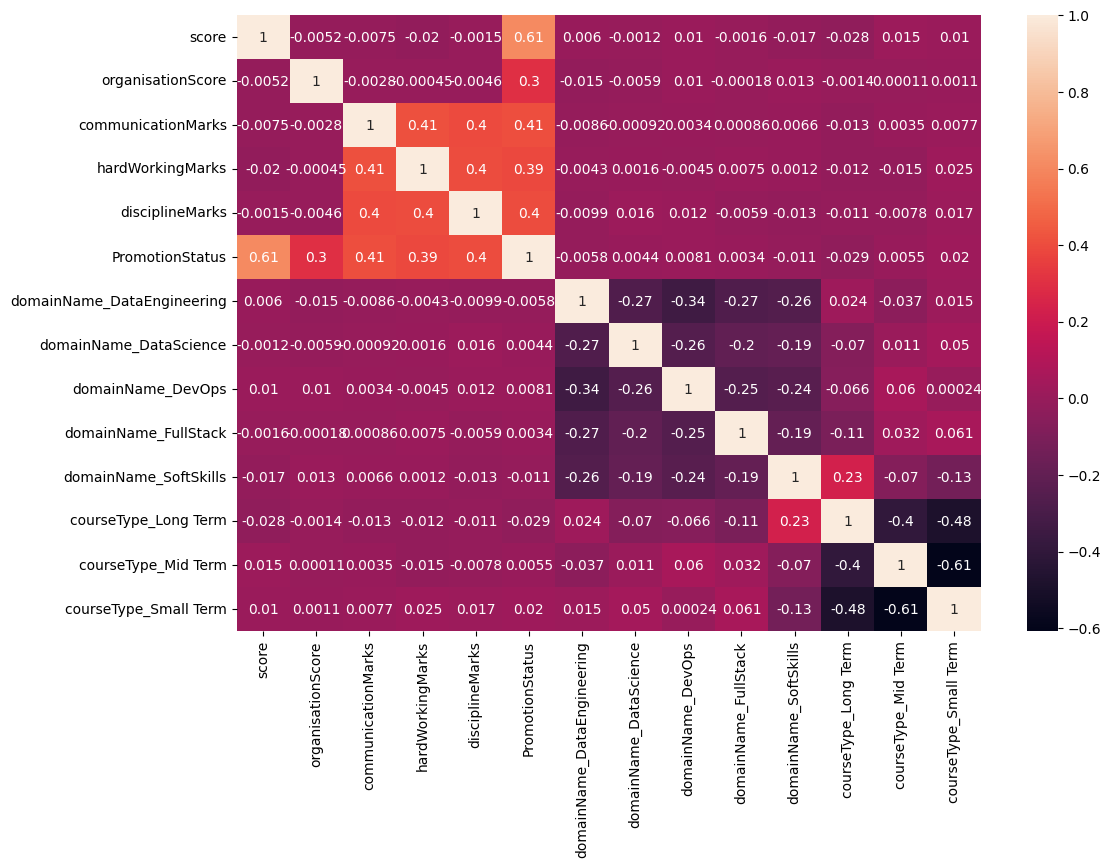

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(training_data.corr(),annot=True)

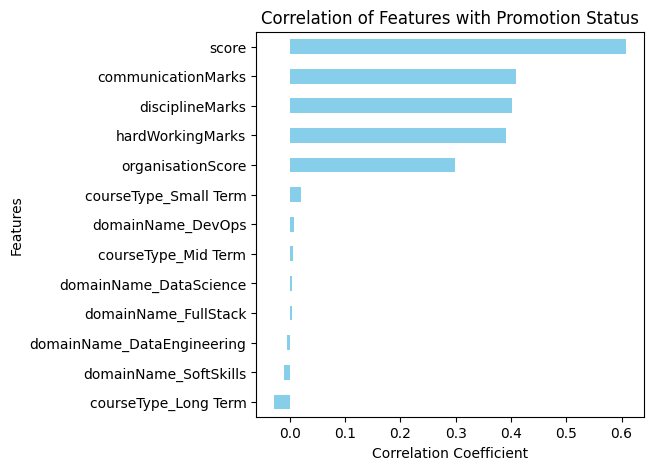

In [26]:
corr_matrix = training_data.corr()
corr_with_target = corr_matrix['PromotionStatus'].drop('PromotionStatus') 

corr_with_target_sorted = corr_with_target.sort_values()

plt.figure(figsize=(5, 5))
corr_with_target_sorted.plot(kind='barh', color='skyblue')

plt.title('Correlation of Features with Promotion Status')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

##### Model Training

In [165]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [166]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [167]:
training_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10508 entries, 0 to 10507
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   score                       10508 non-null  int64
 1   organisationScore           10508 non-null  int64
 2   communicationMarks          10508 non-null  int64
 3   hardWorkingMarks            10508 non-null  int64
 4   disciplineMarks             10508 non-null  int64
 5   PromotionStatus             10508 non-null  int64
 6   domainName_DataEngineering  10508 non-null  bool 
 7   domainName_DataScience      10508 non-null  bool 
 8   domainName_DevOps           10508 non-null  bool 
 9   domainName_FullStack        10508 non-null  bool 
 10  domainName_SoftSkills       10508 non-null  bool 
 11  courseType_Long Term        10508 non-null  bool 
 12  courseType_Mid Term         10508 non-null  bool 
 13  courseType_Small Term       10508 non-null  bool 
dtypes: boo

In [170]:
X=training_data.drop('PromotionStatus',axis=1)
Y=training_data['PromotionStatus'].values



In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [177]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 184   28    0]
 [  17 1390    2]
 [   0   14  467]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       212
           1       0.97      0.99      0.98      1409
           2       1.00      0.97      0.98       481

    accuracy                           0.97      2102
   macro avg       0.96      0.94      0.95      2102
weighted avg       0.97      0.97      0.97      2102

